In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

%matplotlib inline

In [2]:
!pip install -U numpy scipy scikit-learn

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [4]:
df = pd.concat([df_train, df_test])

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.drop(["User_ID"], axis = 1, inplace=True)

In [7]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


Making Gender a numerical value


In [8]:
df["Gender"] = df["Gender"].map({"F" : 0, "M" : 1})

In [9]:
df.head(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


Making the age to numerical feature

In [10]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
df["Age"] = df["Age"].map({"0-17" : 1, "18-25" : 2, "26-35" : 3, "36-45" : 4, "46-50" : 5, "51-55" : 6, "55+" : 7})

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
df.rename(columns = {"Age" : "Age_Category"})

,Product_ID,Gender,Age_Category,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [14]:
df_city = pd.get_dummies(df["City_Category"], drop_first=True)

In [15]:
df = pd.concat([df,df_city], axis = 1)

In [16]:
df.drop("City_Category", axis = 1, inplace=True)

In [17]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [18]:
print(df["Product_Category_2"].mode())
print(df["Product_Category_3"].mode())
df["Product_Category_2"].value_counts().reset_index()

0    8.0
Name: Product_Category_2, dtype: float64
0    16.0
Name: Product_Category_3, dtype: float64


,Product_Category_2,count
0,8.0,91317
1,14.0,78834
2,2.0,70498
3,16.0,61687
4,15.0,54114
5,5.0,37165
6,4.0,36705
7,6.0,23575
8,11.0,20230
9,17.0,19104


In [19]:
df["Product_Category_3"].value_counts().reset_index()

,Product_Category_3,count
0,16.0,46469
1,15.0,39968
2,14.0,26283
3,17.0,23818
4,5.0,23799
5,8.0,17861
6,9.0,16532
7,12.0,13115
8,13.0,7849
9,6.0,6888


In [20]:
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_2"].mode()[0])

In [21]:
df["Product_Category_2"].isna().sum()

0

In [22]:
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [23]:
df["Product_Category_3"].isna().sum()

0

In [24]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [25]:
df.head(50)

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,False,True
5,P00193542,1,3,15,3,0,1,2.0,16.0,15227.0,False,False
6,P00184942,1,5,7,2,1,1,8.0,17.0,19215.0,True,False
7,P00346142,1,5,7,2,1,1,15.0,16.0,15854.0,True,False
8,P0097242,1,5,7,2,1,1,16.0,16.0,15686.0,True,False
9,P00274942,1,3,20,1,1,8,8.0,16.0,7871.0,False,False


In [26]:
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [27]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].str.replace('+', '')

Stay in City is an object which means it is a string, we need to change it to int.

In [28]:
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 67.3+ MB


In [30]:
df['B'] = df["B"].astype(int)
df['C'] = df["C"].astype(int)


In [31]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


<Axes: xlabel='Age', ylabel='Purchase'>

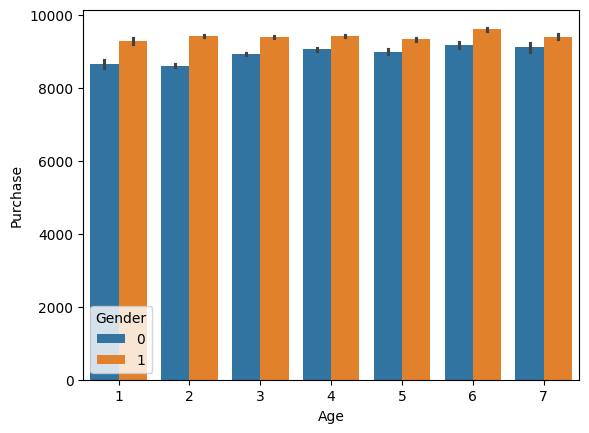

In [32]:
sns.barplot(x = "Age", y= "Purchase", hue = 'Gender', data = df)

<Axes: xlabel='Age', ylabel='Purchase'>

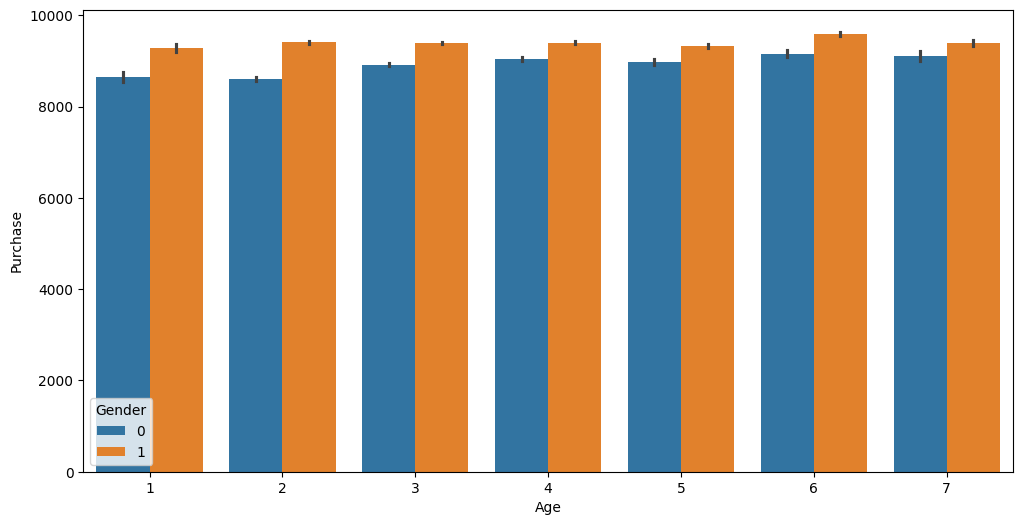

In [33]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Age",y="Purchase",hue = "Gender", data=df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

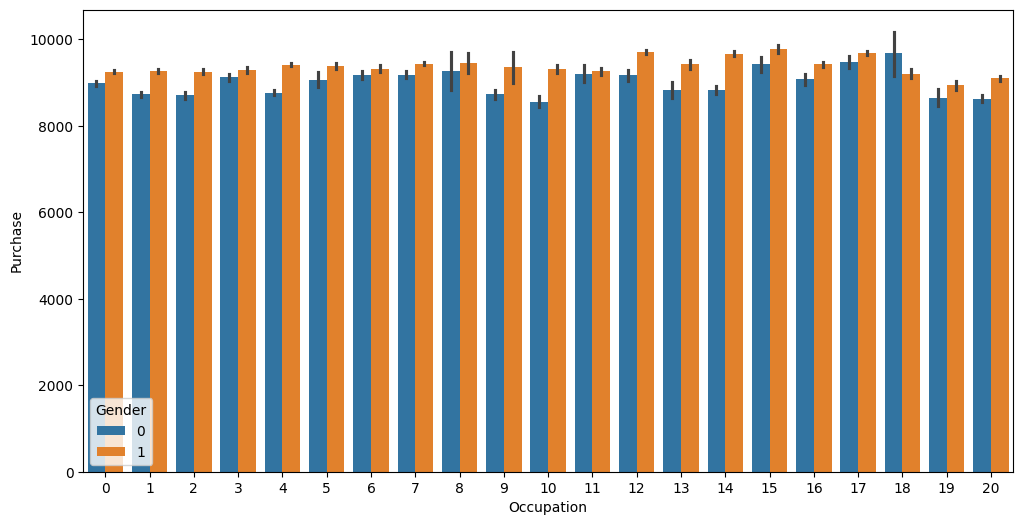

In [34]:
sns.barplot(x="Occupation",y="Purchase",hue = "Gender", data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

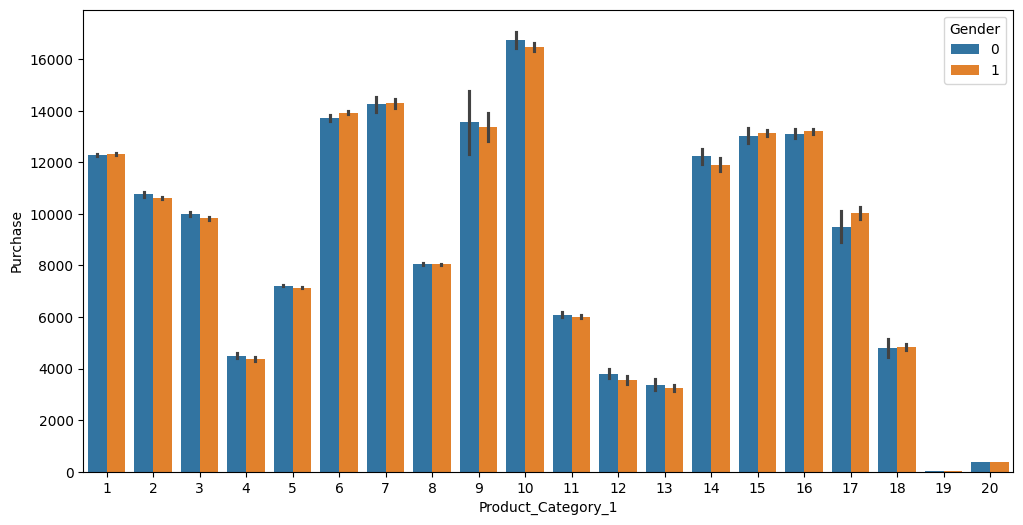

In [35]:
sns.barplot(x="Product_Category_1",y="Purchase",hue = "Gender", data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

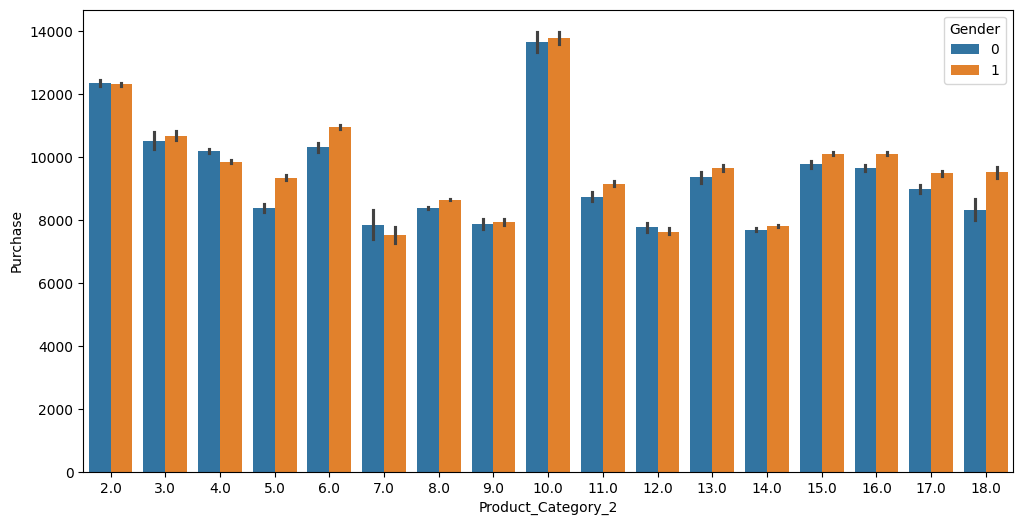

In [36]:
sns.barplot(x="Product_Category_2",y="Purchase",hue = "Gender", data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

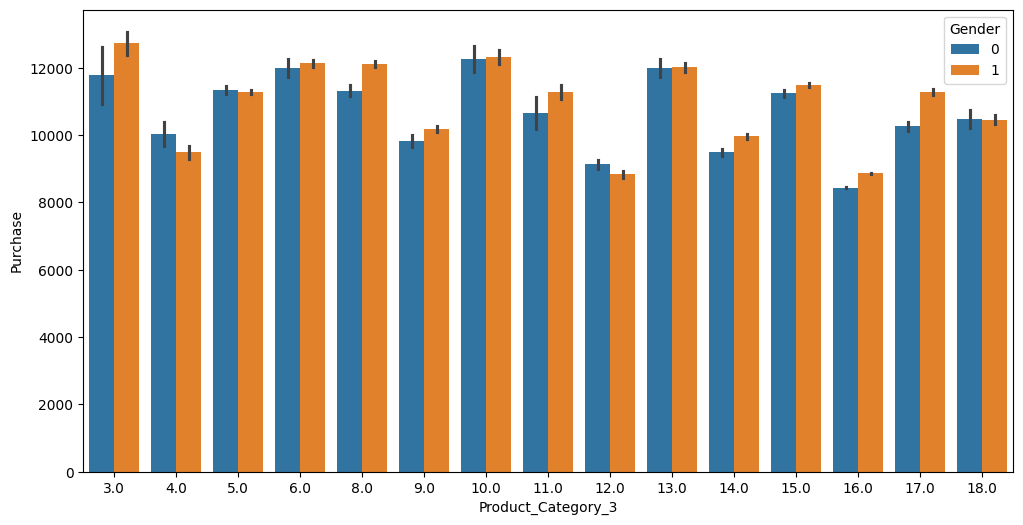

In [37]:
sns.barplot(x="Product_Category_3",y="Purchase",hue = "Gender", data=df)

In [38]:
df_test = df[df["Purchase"].isnull()]

In [39]:
df_test.shape

(233599, 12)

In [40]:
df_train =df[~df["Purchase"].isnull()]

In [41]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [60]:
X = df_train.drop("Purchase", axis=1)

X = X.drop("Product_ID", axis = 1)
X.shape

(550068, 10)

In [61]:
Y = df_train["Purchase"]
print(Y.shape)
Y.head()

(550068,)


0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(X_train.shape)
print(X_test.shape)

(368545, 10)
(181523, 10)


In [74]:
X_train = scaler.fit_transform(X_train)



In [75]:
X_test = scaler.transform(X_test)